# Artificial Neaural Networks

4.2 Veri hazırlama

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense
from keras.models import load_model

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

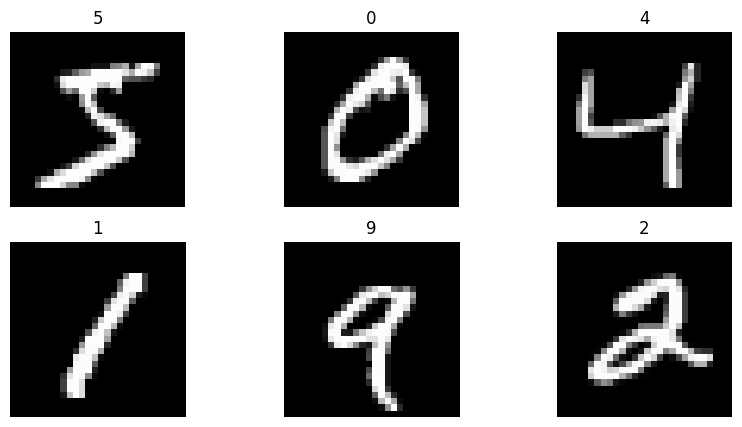

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2])).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2])).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

4.3 Modelin oluşturulması ve derlenmesi

In [4]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(28*28,))) # relu daha hızlı çalışır, - değerlerde 0 a yaklaşır

model.add(Dense(256, activation='tanh')) # tanh -1 ile 1 arasında değer alır

# 10 tane olmak zorunda çünkü 10 col var ve 2 den fazla col oldugu için softmax kullanıyoruz
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])

4.4 callbacks ve model eğitimi

In [15]:
# patience = 3 -> 3 epoch boyunca val loss degismmiyorsa erken durdurma yapar
# restore_best_weights = True -> en iyi modelin ağırlıkları geri yükler 

es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

cp = ModelCheckpoint("ann_best_model.h5", monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train, epochs=10, batch_size=60, validation_split=0.2, callbacks=[es, cp]) 

Epoch 1/10
794/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9914 - loss: 0.0251

800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9914 - loss: 0.0252 - val_accuracy: 0.9737 - val_loss: 0.1024
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9937 - loss: 0.0182

800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9937 - loss: 0.0182 - val_accuracy: 0.9773 - val_loss: 0.0980
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9950 - loss: 0.0139 - val_accuracy: 0.9723 - val_loss: 0.1179
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9718 - val_loss: 0.1297
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9755 - val_loss: 0.1167


4.5 Degerlendirme

In [16]:
test_loss = model.evaluate(x_test, y_test)
print(f"Test acc", test_loss[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.1017
Test acc 0.9789000153541565


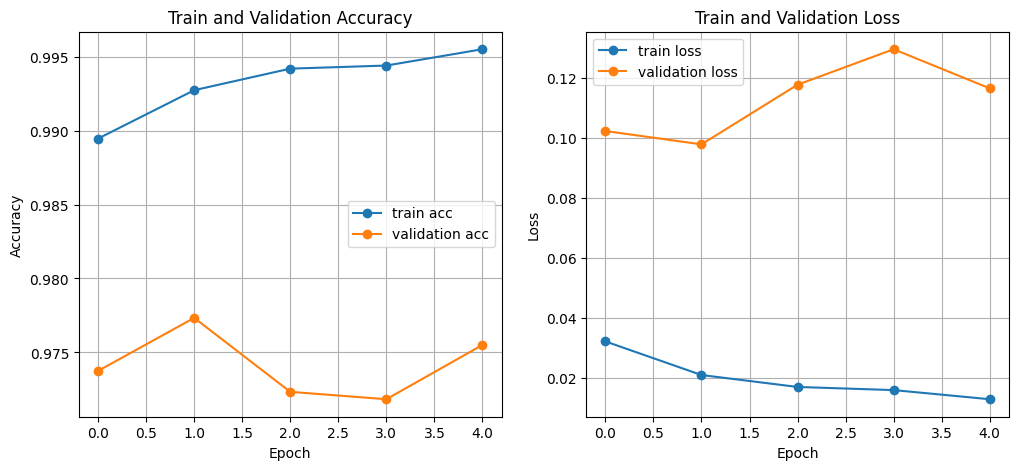

In [ ]:
plt.figure(figsize=(12, 5))

# Acc
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker="o", label='train acc')
plt.plot(history.history['val_accuracy'], marker="o", label='validation acc')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker="o", label='train loss')
plt.plot(history.history['val_loss'], marker="o", label='validation loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [27]:
model.save("final_ann_model.h5")

In [28]:
load_model = load_model("final_ann_model.h5")

test_loss = load_model.evaluate(x_test, y_test)
print(f"Test acc", test_loss[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.1017
Test acc 0.9789000153541565
